In [142]:
import pandas as pd
import numpy as np

# Load datasets
#injury_history = pd.read_csv('ischool/injury_history(injury_history).csv')
injury_df  = pd.read_csv('/Users/rithikagurram/Documents/Semester 3/AI_competition/injury_history(injury_history).csv')

muscle_df = pd.read_csv('/Users/rithikagurram/Documents/Semester 3/AI_competition/injury_history(muscle_imbalance_data).csv')
sessions_df = pd.read_csv('/Users/rithikagurram/Documents/Semester 3/AI_competition/injury_history(player_sessions).csv',encoding='ISO-8859-1')

In [143]:
import os
print(os.getcwd())


/Users/rithikagurram/Documents/Semester 3/AI_competition


In [144]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_')
    return df

# Apply the function to each DataFrame
sessions_df = clean_column_names(sessions_df)
muscle_df = clean_column_names(muscle_df)
injury_df = clean_column_names(injury_df)

In [145]:
injury_df.head()

,Player_ID,Name,Group_Id,Injury_Type,Body_Part,Side,Injury_Date,Severity,Recovery_Time_days,Additional_Notes
0,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...
1,101,Jordan Matthews,201,Tendonitis,Wrist,Left,10/25/2023,NaN,11,De Quervain's tenosynovitis. Swelling and pain...
2,101,Jordan Matthews,201,Tendonitis,Shoulder,Right,7/22/2023,NaN,12,Rotator cuff tendonitis due to overuse. Anti-i...
3,103,Malik Robinson,203,Strain,Groin,Right,6/28/2023,Grade 1,20,"Grade 1 groin strain, characterized by mild ov..."
4,103,Malik Robinson,203,Fracture,Wrist,Left,2/14/2023,NaN,68,Distal radius fracture. Cast applied. Recovery...


In [146]:
injury_df.shape

(21, 10)

In [147]:
sessions_df.head()

,Name,Player_ID,Group_Id,Group_name,League_ID,Session_ID,Session_Date,Position,Distance_mi,Distance_min_mi,...,Heart_Rate_min_bpm,Heart_Rate_max_bpm,Human_Core_Temperature_F,Human_Core_Temperature_max_F,TRIMP,Heart_Rate_Recoveries,Jump_Height_max_ft,Changes_of_Orientation,Exertions,Disk_Usage
0,Anthony Lopez,112,212,Group 1,301,1001,1/1/2023,Center,4.58,0.12,...,74,198,99.47,101.24,261,5,2.31,229,307,58.56
1,Anthony Lopez,112,212,Group 1,301,1002,1/3/2023,Center,1.18,0.11,...,62,179,99.56,99.33,270,6,2.44,427,180,44.93
2,Anthony Lopez,112,212,Group 1,301,1003,1/4/2023,Center,5.59,0.14,...,78,172,100.06,102.31,149,4,3.04,383,440,15.32
3,Anthony Lopez,112,212,Group 1,301,1004,1/6/2023,Center,3.22,0.09,...,64,186,100.45,101.10,180,10,3.17,462,450,21.46
4,Anthony Lopez,112,212,Group 1,301,1005,1/7/2023,Center,2.19,0.10,...,62,146,98.73,100.91,152,4,1.28,118,416,20.51


In [148]:
sessions_df.shape

(2604, 30)

In [149]:
#print("\nMuscle Imbalance Data Dataset:")
muscle_df .head()

,Player_ID,Session_ID,Player_Name,Date_Recorded,Hamstring_To_Quad_Ratio,Quad_Imbalance_Percent,HamstringImbalance_Percent,Calf_Imbalance_Percent,Groin_Imbalance_Percent
0,112,101,Anthony Lopez,1/1/2023,0.808741,-10.149294,-8.208145,-10.176416,-10.258755
1,112,102,Anthony Lopez,2/1/2023,0.814355,-10.105784,-8.229693,-10.106144,-10.063777
2,112,103,Anthony Lopez,3/1/2023,0.887331,-10.027546,-8.897757,-10.257486,-9.990676
3,112,104,Anthony Lopez,4/1/2023,0.929176,-10.137407,-9.419432,-10.220899,-10.179258
4,112,105,Anthony Lopez,5/1/2023,0.866234,-9.958386,-8.626291,-10.412659,-10.208611


In [150]:
muscle_df.shape

(182, 9)

In [151]:
injury_df.columns

Index(['Player_ID', 'Name', 'Group_Id', 'Injury_Type', 'Body_Part', 'Side',
       'Injury_Date', 'Severity', 'Recovery_Time_days', 'Additional_Notes'],
      dtype='object')

In [152]:
sessions_df.columns

Index(['Name', 'Player_ID', 'Group_Id', 'Group_name', 'League_ID',
       'Session_ID', 'Session_Date', 'Position', 'Distance_mi',
       'Distance_min_mi', 'Duration_s', 'Steps', 'Speed_of_max',
       'Speed_max_mph', 'Speed_mph', 'Time_s', 'Accumulated_Acceleration_Load',
       'Anaerobic_Activity_distance_mi', 'Jump_Load_J', 'Heart_Rate_bpm',
       'Heart_Rate_min_bpm', 'Heart_Rate_max_bpm', 'Human_Core_Temperature_F',
       'Human_Core_Temperature_max_F', 'TRIMP', 'Heart_Rate_Recoveries',
       'Jump_Height_max_ft', 'Changes_of_Orientation', 'Exertions',
       'Disk_Usage'],
      dtype='object')

In [153]:
muscle_df.columns

Index(['Player_ID', 'Session_ID', 'Player_Name', 'Date_Recorded',
       'Hamstring_To_Quad_Ratio', 'Quad_Imbalance_Percent',
       'HamstringImbalance_Percent', 'Calf_Imbalance_Percent',
       'Groin_Imbalance_Percent'],
      dtype='object')

In [154]:
sessions_df['Session_Date'] = pd.to_datetime(sessions_df['Session_Date'])
sessions_df['join_key'] = (sessions_df['Player_ID'].astype(str) + '_' + 
                          sessions_df['Session_Date'].dt.month.astype(str) + '_' +
                          sessions_df['Session_Date'].dt.year.astype(str))

muscle_df['Date_Recorded'] = pd.to_datetime(muscle_df['Date_Recorded'])
muscle_df['join_key'] = (muscle_df['Player_ID'].astype(str) + '_' + 
                        muscle_df['Date_Recorded'].dt.month.astype(str) + '_' +
                        muscle_df['Date_Recorded'].dt.year.astype(str))


sessions_muscle_merged = pd.merge(
    sessions_df,
    muscle_df,
    on='join_key',
    how='left',
    suffixes=('', '_muscle')
)

columns_to_drop = ['Player_ID_muscle', 'Player_Name','Session_ID_muscle'] #where are Player_ID_muscle','Session_ID_muscle' columns
sessions_muscle_merged = sessions_muscle_merged.drop(columns=columns_to_drop)

In [155]:
injury_df['Injury_Date'] = pd.to_datetime(injury_df['Injury_Date'])
injury_df['join_key'] = (injury_df['Player_ID'].astype(str) + '_' + 
                        injury_df['Injury_Date'].dt.month.astype(str) + '_' +
                        injury_df['Injury_Date'].dt.year.astype(str))

final_merged_df = pd.merge(
    sessions_muscle_merged,
    injury_df,
    on=['join_key'],
    how='left',
    suffixes=('', '_injury')
)

columns_to_drop = ['Player_ID_injury', 'Name_injury', 'Group_Id_injury']
final_merged_df = final_merged_df.drop(columns=columns_to_drop)

In [156]:
final_merged_df.head()

,Name,Player_ID,Group_Id,Group_name,League_ID,Session_ID,Session_Date,Position,Distance_mi,Distance_min_mi,...,HamstringImbalance_Percent,Calf_Imbalance_Percent,Groin_Imbalance_Percent,Injury_Type,Body_Part,Side,Injury_Date,Severity,Recovery_Time_days,Additional_Notes
0,Anthony Lopez,112,212,Group 1,301,1001,2023-01-01,Center,4.58,0.12,...,-8.208145,-10.176416,-10.258755,Strain,Knee,Left,2023-01-26,Grade 1,28.0,Strain of the posterior cruciate ligament (PCL...
1,Anthony Lopez,112,212,Group 1,301,1002,2023-01-03,Center,1.18,0.11,...,-8.208145,-10.176416,-10.258755,Strain,Knee,Left,2023-01-26,Grade 1,28.0,Strain of the posterior cruciate ligament (PCL...
2,Anthony Lopez,112,212,Group 1,301,1003,2023-01-04,Center,5.59,0.14,...,-8.208145,-10.176416,-10.258755,Strain,Knee,Left,2023-01-26,Grade 1,28.0,Strain of the posterior cruciate ligament (PCL...
3,Anthony Lopez,112,212,Group 1,301,1004,2023-01-06,Center,3.22,0.09,...,-8.208145,-10.176416,-10.258755,Strain,Knee,Left,2023-01-26,Grade 1,28.0,Strain of the posterior cruciate ligament (PCL...
4,Anthony Lopez,112,212,Group 1,301,1005,2023-01-07,Center,2.19,0.10,...,-8.208145,-10.176416,-10.258755,Strain,Knee,Left,2023-01-26,Grade 1,28.0,Strain of the posterior cruciate ligament (PCL...


In [157]:
final_merged_df.columns

Index(['Name', 'Player_ID', 'Group_Id', 'Group_name', 'League_ID',
       'Session_ID', 'Session_Date', 'Position', 'Distance_mi',
       'Distance_min_mi', 'Duration_s', 'Steps', 'Speed_of_max',
       'Speed_max_mph', 'Speed_mph', 'Time_s', 'Accumulated_Acceleration_Load',
       'Anaerobic_Activity_distance_mi', 'Jump_Load_J', 'Heart_Rate_bpm',
       'Heart_Rate_min_bpm', 'Heart_Rate_max_bpm', 'Human_Core_Temperature_F',
       'Human_Core_Temperature_max_F', 'TRIMP', 'Heart_Rate_Recoveries',
       'Jump_Height_max_ft', 'Changes_of_Orientation', 'Exertions',
       'Disk_Usage', 'join_key', 'Date_Recorded', 'Hamstring_To_Quad_Ratio',
       'Quad_Imbalance_Percent', 'HamstringImbalance_Percent',
       'Calf_Imbalance_Percent', 'Groin_Imbalance_Percent', 'Injury_Type',
       'Body_Part', 'Side', 'Injury_Date', 'Severity', 'Recovery_Time_days',
       'Additional_Notes'],
      dtype='object')

In [158]:
final_merged_df.shape

(2604, 44)

In [159]:
import pandas as pd

# Assuming your merged DataFrame is named df
final_merged_df.to_csv('merged_dataframe.csv', index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
merged_data = pd.read_csv('merged_dataframe.csv')

# Display basic information and initial rows
print("Data Info:")
print(merged_data.info())
print("\nFirst 5 rows:")
print(merged_data.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2604 non-null   object 
 1   Player_ID                       2604 non-null   int64  
 2   Group_Id                        2604 non-null   int64  
 3   Group_name                      2604 non-null   object 
 4   League_ID                       2604 non-null   int64  
 5   Session_ID                      2604 non-null   int64  
 6   Session_Date                    2604 non-null   object 
 7   Position                        2604 non-null   object 
 8   Distance_mi                     2604 non-null   float64
 9   Distance_min_mi                 2604 non-null   float64
 10  Duration_s                      2604 non-null   int64  
 11  Steps                           2604 non-null   int64  
 12  Speed_of_max           

In [161]:
# Calculate the number of missing values in each column
missing_values = merged_data.isnull().sum()

# Display the missing values for each column
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Name                                 0
Player_ID                            0
Group_Id                             0
Group_name                           0
League_ID                            0
Session_ID                           0
Session_Date                         0
Position                             0
Distance_mi                          0
Distance_min_mi                      0
Duration_s                           0
Steps                                0
Speed_of_max                         0
Speed_max_mph                        0
Speed_mph                            0
Time_s                               0
Accumulated_Acceleration_Load        0
Anaerobic_Activity_distance_mi       0
Jump_Load_J                          0
Heart_Rate_bpm                       0
Heart_Rate_min_bpm                   0
Heart_Rate_max_bpm                   0
Human_Core_Temperature_F             0
Human_Core_Temperature_max_F         0
TRIMP                  

In [162]:
# Step 3: Handling Missing Values

# Example: Fill missing values for categorical columns with 'None'
categorical_columns = ['Injury_Type', 'Body_Part', 'Side', 'Severity', 'Additional_Notes']
for col in categorical_columns:
    if col in data.columns:
        # Updated to avoid chained assignment warning
        data[col] = data[col].fillna('None')

# Example: Fill missing values for numerical columns with 0 or mean
numerical_columns = ['Recovery_Time_days', 'Distance_mi', 'Speed_mph', 'Heart_Rate_bpm', 'Jump_Height_max_ft']
for col in numerical_columns:
    if col in data.columns:
        # Updated to avoid chained assignment warning
        data[col] = data[col].fillna(0)
        # Alternatively, fill with mean value: data[col] = data[col].fillna(data[col].mean())

# Check again for missing values after handling them
missing_values_after = data.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after[missing_values_after > 0])


Missing values after cleaning:
Series([], dtype: int64)


In [163]:
# Fill missing Injury_Date with a placeholder date or keep it as NaN
merged_data['Injury_Date'] = merged_data['Injury_Date'].fillna(pd.Timestamp('1970-01-01'))


In [164]:
# Convert 'Session_Date' and 'Injury_Date' to datetime format
merged_data['Session_Date'] = pd.to_datetime(merged_data['Session_Date'], errors='coerce')
merged_data['Injury_Date'] = pd.to_datetime(merged_data['Injury_Date'], errors='coerce')

# Create an 'Injured' column: 1 if injured, 0 if not
merged_data['Injured'] = merged_data['Injury_Type'].notnull().astype(int)

# Fill missing values for injury-related columns
merged_data['Injury_Type'] = merged_data['Injury_Type'].fillna('None')
merged_data['Body_Part'] = merged_data['Body_Part'].fillna('None')
merged_data['Side'] = merged_data['Side'].fillna('None')
merged_data['Severity'] = merged_data['Severity'].fillna('None')
merged_data['Recovery_Time_days'] = merged_data['Recovery_Time_days'].fillna(0)
merged_data['Additional_Notes'] = merged_data['Additional_Notes'].fillna('No notes')
merged_data['Injury_Date'] = merged_data['Injury_Date'].fillna(pd.NaT)

# Verify that missing values have been handled
print("\nMissing Values After Cleaning:")
print(merged_data.isnull().sum().sort_values(ascending=False))
print("\nDistribution of Injured column:")
print(merged_data['Injured'].value_counts())



Missing Values After Cleaning:
Name                              0
Human_Core_Temperature_max_F      0
Heart_Rate_Recoveries             0
Jump_Height_max_ft                0
Changes_of_Orientation            0
Exertions                         0
Disk_Usage                        0
join_key                          0
Date_Recorded                     0
Hamstring_To_Quad_Ratio           0
Quad_Imbalance_Percent            0
HamstringImbalance_Percent        0
Calf_Imbalance_Percent            0
Groin_Imbalance_Percent           0
Injury_Type                       0
Body_Part                         0
Side                              0
Injury_Date                       0
Severity                          0
Recovery_Time_days                0
Additional_Notes                  0
TRIMP                             0
Human_Core_Temperature_F          0
Player_ID                         0
Heart_Rate_max_bpm                0
Group_Id                          0
Group_name                      

/Users/rithikagurram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


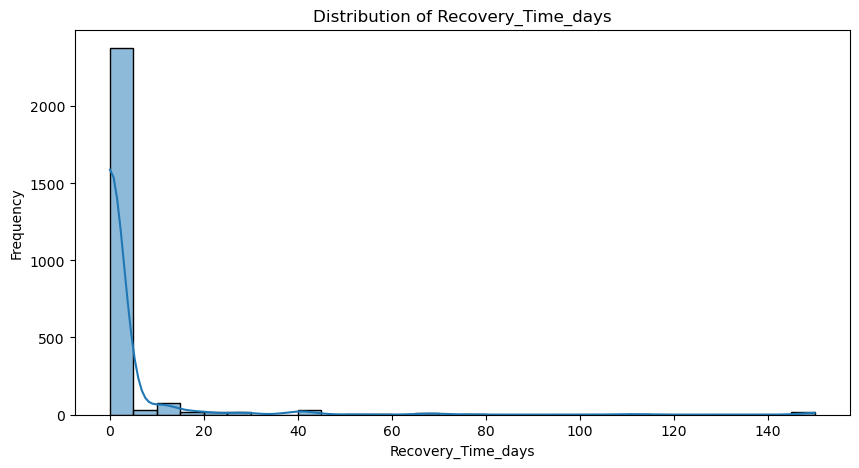

/Users/rithikagurram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


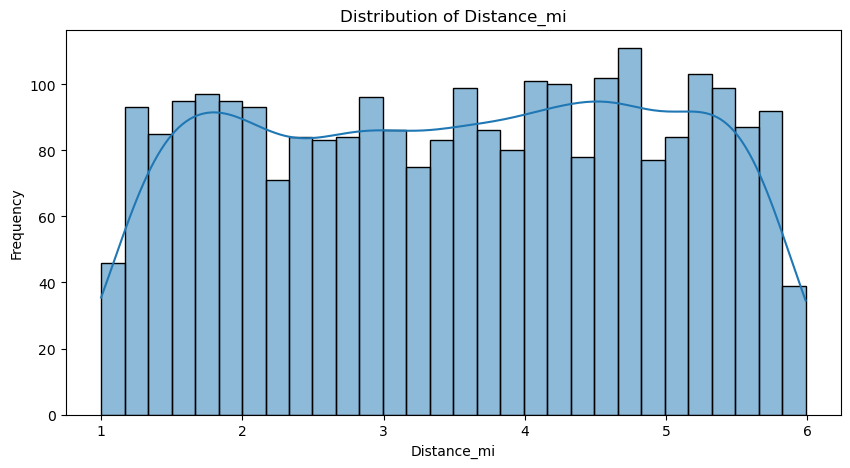

/Users/rithikagurram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


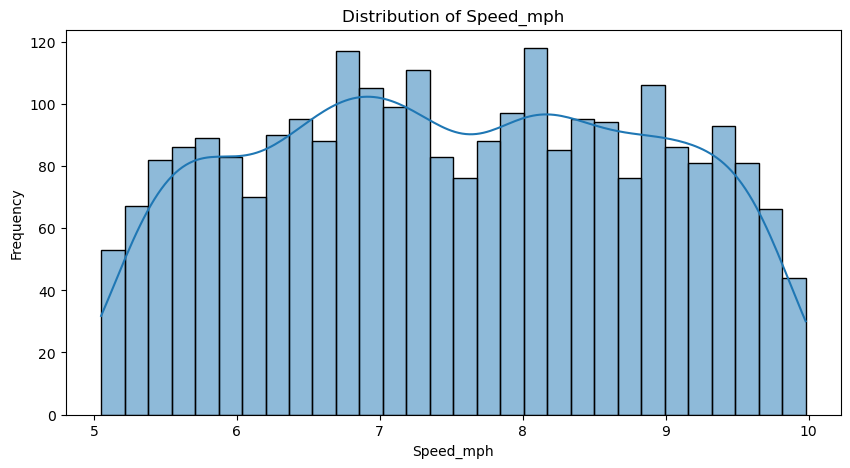

/Users/rithikagurram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


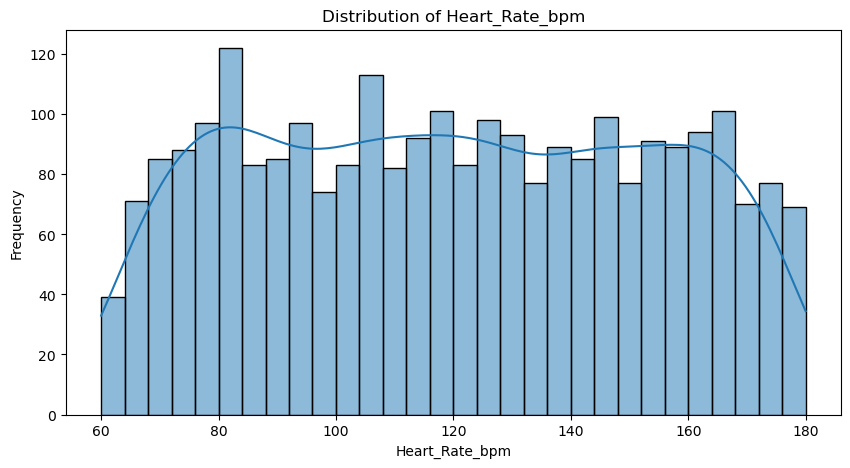

/Users/rithikagurram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


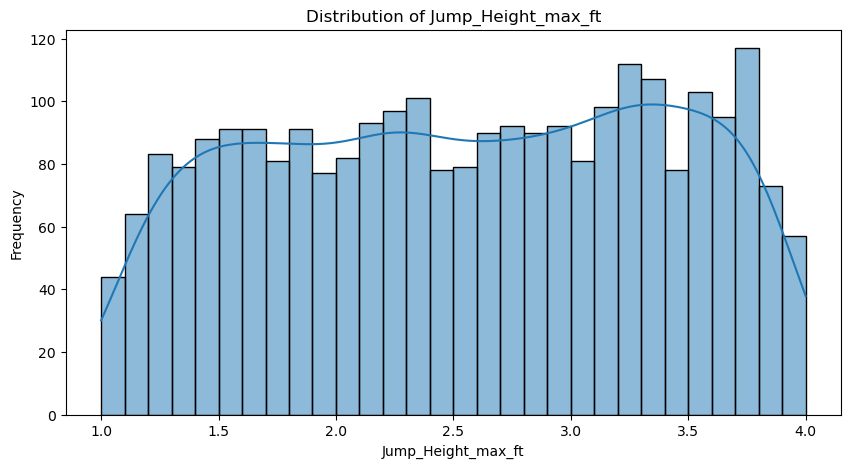

In [166]:
# Visualize Distribution of Key Numerical Columns:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of numerical columns
numerical_columns = ['Recovery_Time_days', 'Distance_mi', 'Speed_mph', 'Heart_Rate_bpm', 'Jump_Height_max_ft']

for col in numerical_columns:
    if col in merged_data.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(merged_data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


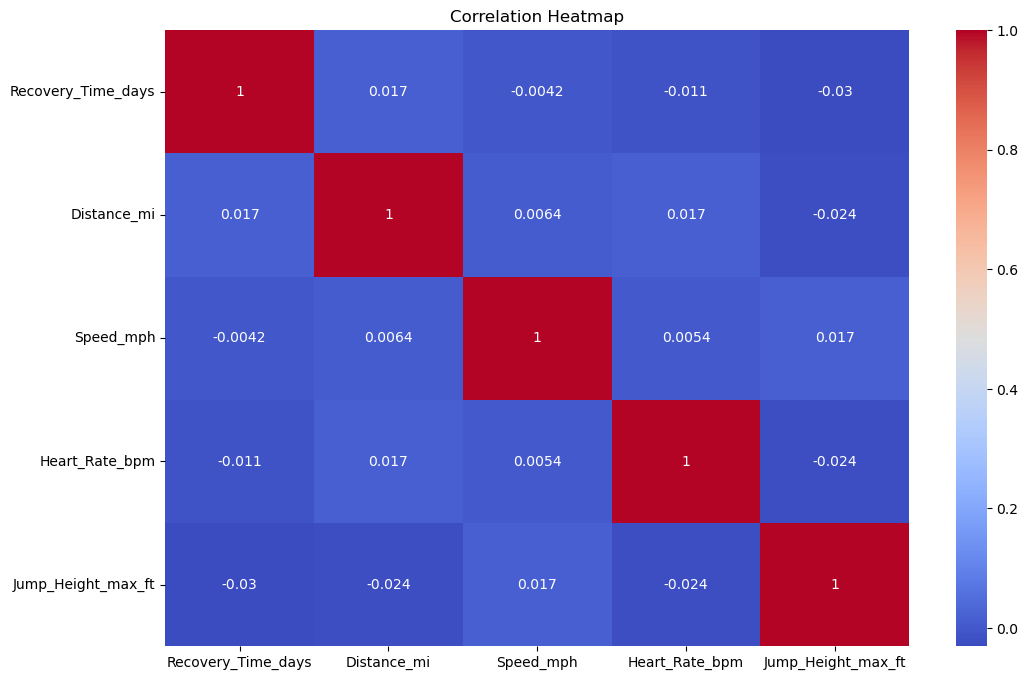

In [167]:
#Correlation Heatmap:

# Generate a correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


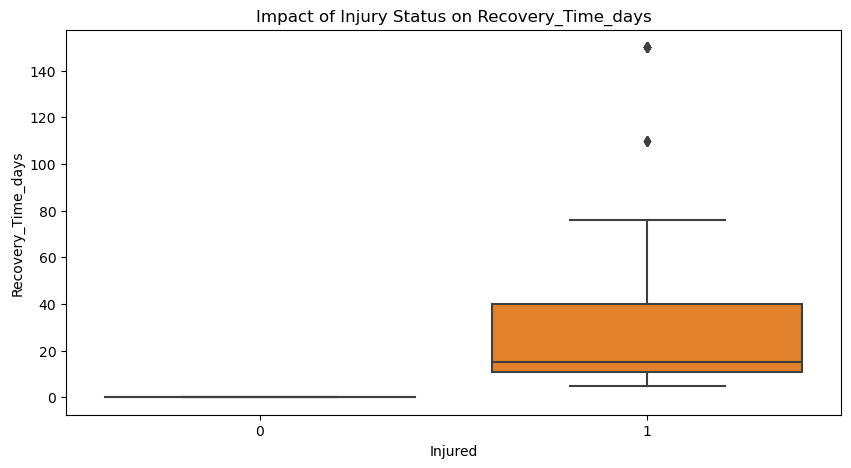

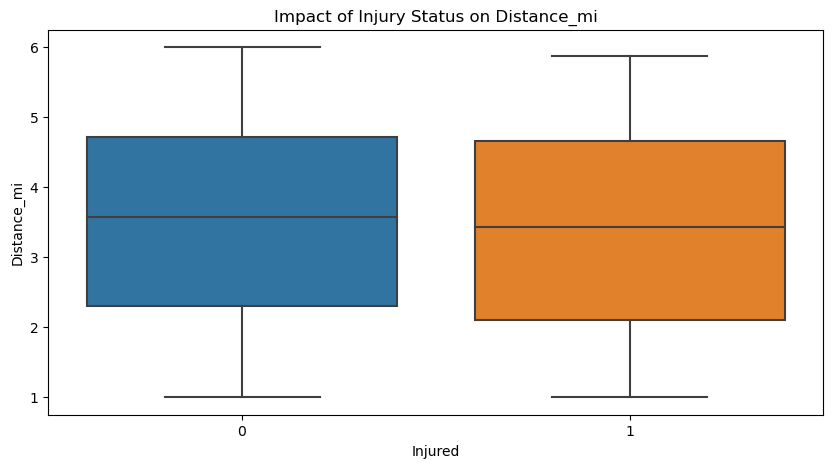

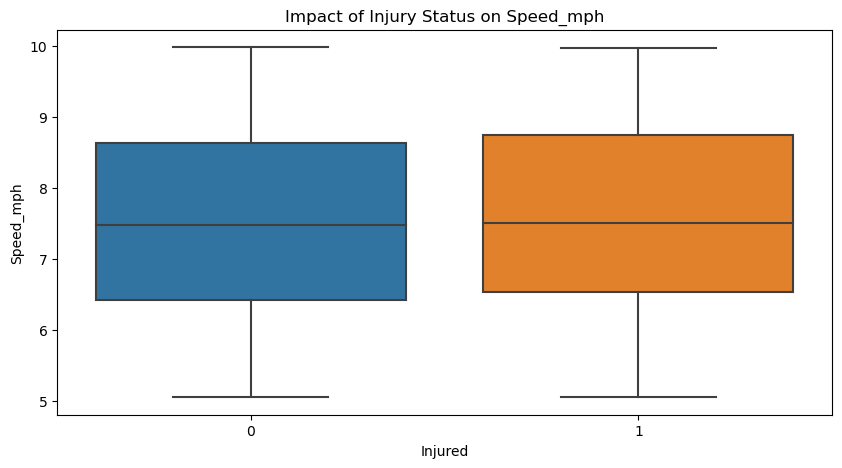

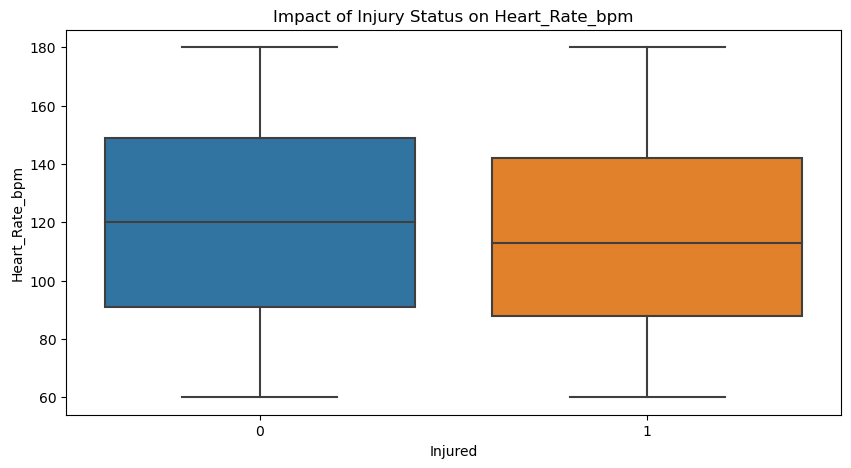

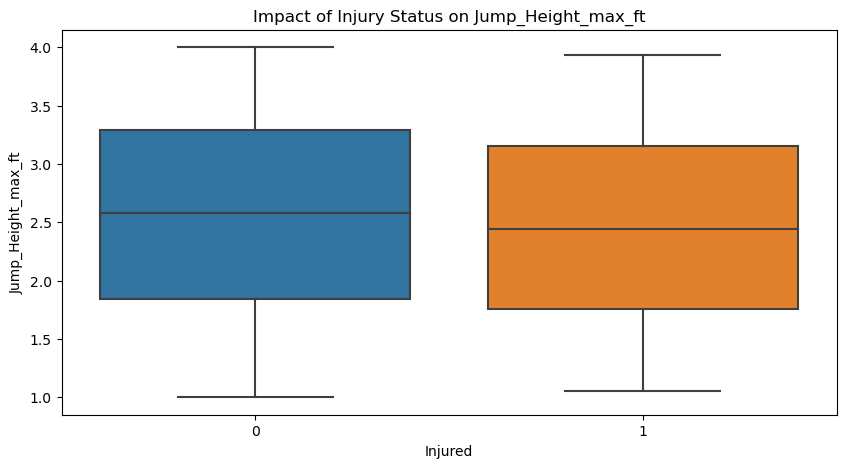

In [168]:
#Relationship Between Injury Status and Numerical Variables:

# Boxplots to visualize the impact of being 'Injured' on key numerical columns
for col in numerical_columns:
    if col in merged_data.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='Injured', y=col, data=merged_data)
        plt.title(f'Impact of Injury Status on {col}')
        plt.xlabel('Injured')
        plt.ylabel(col)
        plt.show()


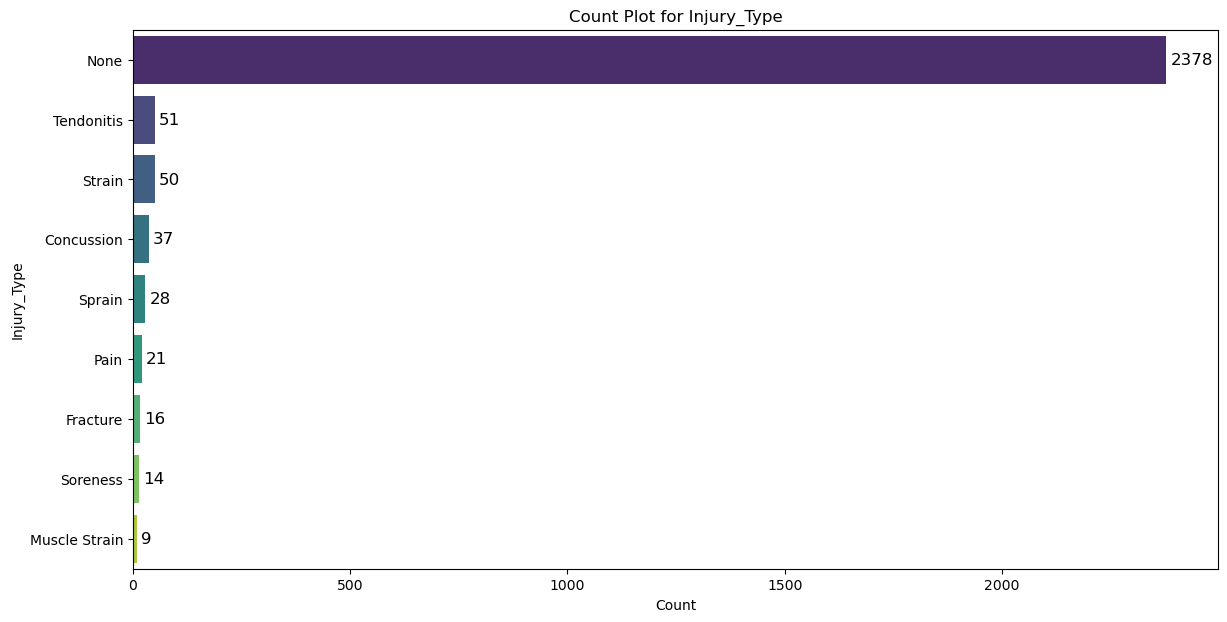

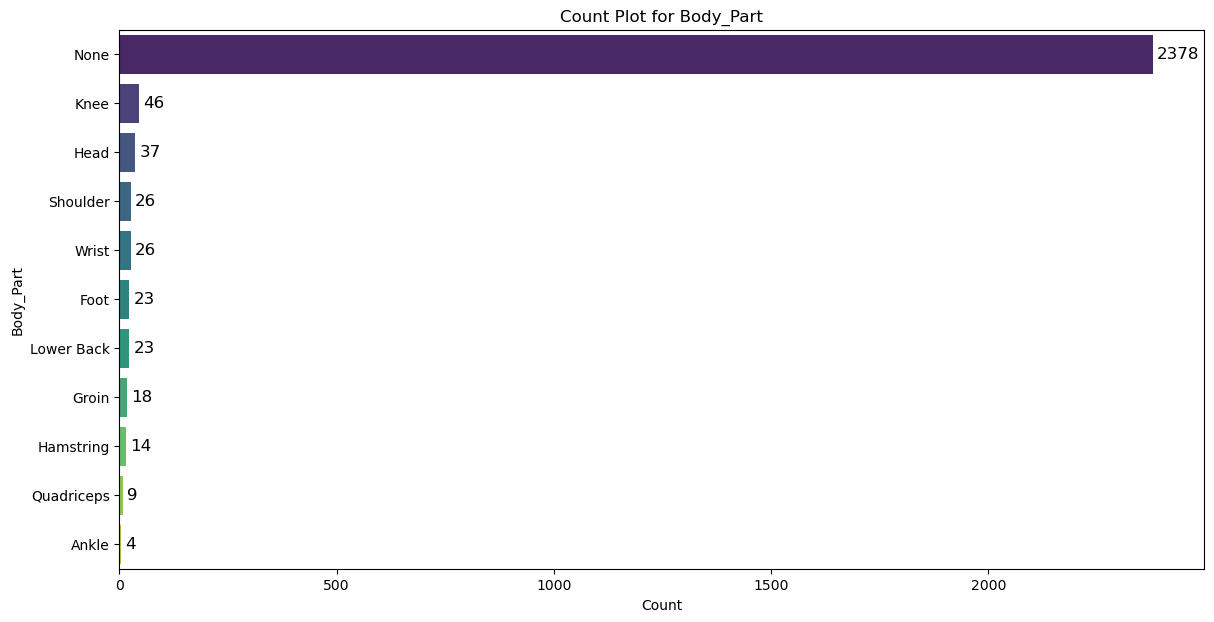

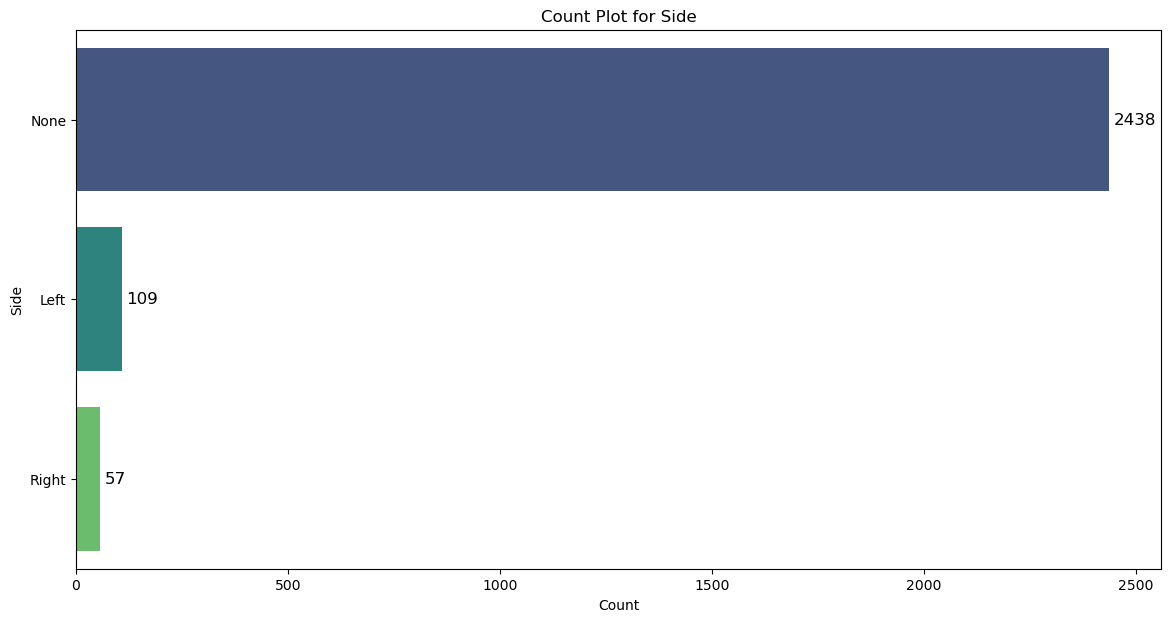

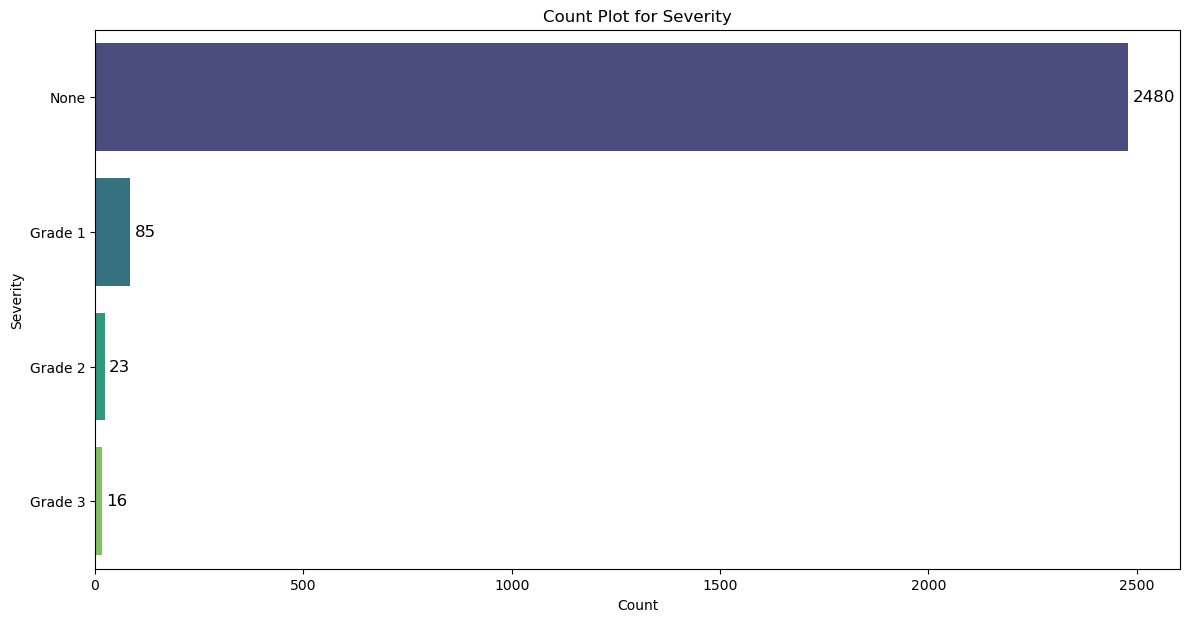

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enhanced count plots with count numbers for categorical columns
categorical_columns = ['Injury_Type', 'Body_Part', 'Side', 'Severity']

for col in categorical_columns:
    if col in merged_data.columns:
        plt.figure(figsize=(14, 7))
        ax = sns.countplot(
            data=merged_data, 
            y=col, 
            order=merged_data[col].value_counts().index,
            palette='viridis'  # You can change the color palette if needed
        )
        
        # Annotate each bar with the count number
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', padding=3, color='black', fontsize=12)
        
        plt.title(f'Count Plot for {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()


In [175]:
#Feature Engineering

# Example: Creating time-based features
merged_data['Session_Weekday'] = merged_data['Session_Date'].dt.day_name()
merged_data['Time_Between_Sessions'] = merged_data['Session_Date'].diff().dt.days.fillna(0)

# Example: Lag features
merged_data['Prev_Session_Heart_Rate'] = merged_data.groupby('Player_ID')['Heart_Rate_bpm'].shift(1)
merged_data['Prev_Session_Speed'] = merged_data.groupby('Player_ID')['Speed_mph'].shift(1)


# Fill NaN values in lagged columns without using inplace
merged_data['Prev_Session_Heart_Rate'] = merged_data['Prev_Session_Heart_Rate'].fillna(merged_data['Heart_Rate_bpm'].mean())
merged_data['Prev_Session_Speed'] = merged_data['Prev_Session_Speed'].fillna(merged_data['Speed_mph'].mean())



In [176]:
#Data Preprocessing
#Encoding categorical variables and scaling numerical features:

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical columns
le = LabelEncoder()
categorical_columns = ['Injury_Type', 'Body_Part', 'Side', 'Severity', 'Session_Weekday']
for col in categorical_columns:
    if col in merged_data.columns:
        merged_data[col] = le.fit_transform(merged_data[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Recovery_Time_days', 'Distance_mi', 'Speed_mph', 'Heart_Rate_bpm', 'Jump_Height_max_ft', 
                     'Prev_Session_Heart_Rate', 'Prev_Session_Speed']
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])


In [177]:
#Splitting the Data

from sklearn.model_selection import train_test_split

# Define features and target
X = merged_data.drop(['Injured', 'Session_Date', 'Injury_Date'], axis=1)  # Drop date columns if not used directly
y = merged_data['Injured']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:
#Model Selection and Training

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Now train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00        60

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521



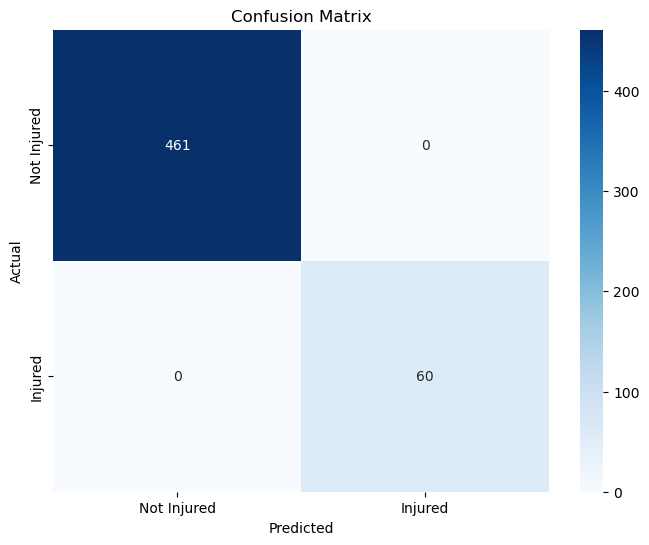

In [185]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Injured', 'Injured'], yticklabels=['Not Injured', 'Injured'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


An accuracy of 1.00 (100%) along with perfect precision, recall, and F1 scores is generally an indication that your model is overfitting, especially if the dataset is not very large or diverse. This means your model may have memorized the training data instead of learning generalizable patterns, leading to perfect performance on the test set.

Things to Check:

Data Leakage: Ensure there is no overlap or leakage of information between the training and test sets that could lead to perfect prediction.

Overfitting: The model might be too complex or may have memorized patterns due to overfitting. Consider cross-validation to evaluate performance on unseen data.

Class Balance: Check if the dataset is imbalanced, as an imbalanced dataset could cause misleading metrics.

Next Steps:
Cross-Validation: Implement cross-validation to check if the model consistently performs well across different subsets of the data.
Simplify the Model: Reduce the complexity of the model or add regularization to prevent overfitting.
Feature Review: Review the features used for training to ensure none of them directly correlate with the target in a way that leads to data leakage.

In [183]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.00
